In [1]:
import pandas as pd

In [2]:
dfa=pd.read_excel("Global Superstore.xls","Orders")

In [3]:
dfa.shape

(51290, 24)

In [4]:
dfa.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
dfa.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [6]:
dfa["Order Priority"].unique()

array(['Critical', 'Medium', 'High', 'Low'], dtype=object)

In [7]:
df1=dfa[(dfa["Order Priority"] == "High") | (dfa["Order Priority"] == "Low")]

In [8]:
df1["Order Priority"].unique()

array(['High', 'Low'], dtype=object)

In [9]:
df=df1

In [10]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# values outside interquartile range(25% to 75%) is called outlier

In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,17925.000000,3501.000000,17925.000000,17925.000000,17925.000000,17925.000000,17925.000000
mean,25603.179135,55976.302771,244.093393,3.476597,0.143186,26.724093,32.088087
std,14794.163361,32314.033393,457.928104,2.276735,0.212772,168.702069,63.154805
min,14.000000,1453.000000,0.852000,1.000000,0.000000,-6599.978000,0.002000
25%,12664.000000,23320.000000,30.360000,2.000000,0.000000,0.000000,3.578000
50%,25625.000000,60423.000000,84.784000,3.000000,0.000000,9.180000,10.250000
75%,38306.000000,90032.000000,252.270000,5.000000,0.200000,36.864000,31.590000
max,51289.000000,99301.000000,11199.968000,14.000000,0.850000,3979.080000,878.380000


# Outlier Treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x192153bed30>,
 'caps': [<matplotlib.lines.Line2D at 0x19215a7b3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x192153bea60>],
 'medians': [<matplotlib.lines.Line2D at 0x19215a7b8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19215a7bb80>],
 'means': []}

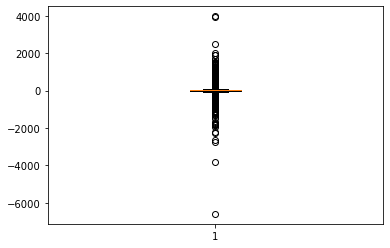

In [12]:
plt.boxplot(df["Profit"])

In [13]:
df["Profit"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     -30.85632
0.25       0.00000
0.50       9.18000
0.75      36.86400
1.00    3979.08000
Name: Profit, dtype: float64

In [14]:
df.shape

(17925, 24)

In [15]:
df_1=df[(df["Profit"] >=0.0) & (df["Profit"] <=36.8100)]

In [16]:
df_1.shape

(9048, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x19215b5e610>,
 'caps': [<matplotlib.lines.Line2D at 0x19215b5ebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19215b5e340>],
 'medians': [<matplotlib.lines.Line2D at 0x19215c7b1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19215c7b490>],
 'means': []}

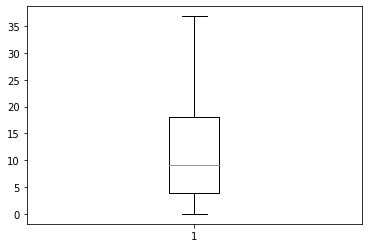

In [17]:
plt.boxplot(df_1["Profit"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19215d1ab50>,
 'caps': [<matplotlib.lines.Line2D at 0x19215d2b160>,
 'boxes': [<matplotlib.lines.Line2D at 0x19215d1a880>],
 'medians': [<matplotlib.lines.Line2D at 0x19215d2b700>],
 'fliers': [<matplotlib.lines.Line2D at 0x19215d2b9d0>],
 'means': []}

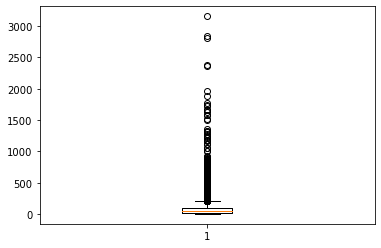

In [18]:
plt.boxplot(df_1["Sales"])

In [19]:
df_1["Sales"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10      12.3600
0.25      23.3175
0.50      48.4800
0.75      95.9510
1.00    3155.5440
Name: Sales, dtype: float64

In [20]:
df_2=df_1[(df_1["Sales"] >=23.64) & (df_1["Sales"] <=96.18)]

In [21]:
df_2.shape

(4503, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x19215d96040>,
 'caps': [<matplotlib.lines.Line2D at 0x19215d96610>,
 'boxes': [<matplotlib.lines.Line2D at 0x19215d85d30>],
 'medians': [<matplotlib.lines.Line2D at 0x19215d96bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19215d96e80>],
 'means': []}

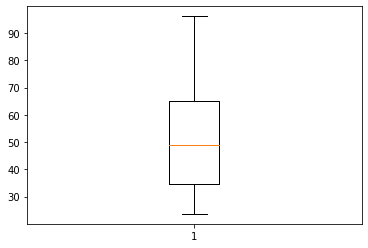

In [22]:
plt.boxplot(df_2["Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19215df4a30>,
 'caps': [<matplotlib.lines.Line2D at 0x19215df4fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19215df4760>],
 'medians': [<matplotlib.lines.Line2D at 0x19215e025b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19215e02880>],
 'means': []}

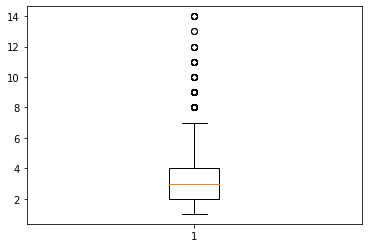

In [23]:
plt.boxplot(df_2["Quantity"])

In [24]:
df_2["Quantity"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     1.0
0.25     2.0
0.50     3.0
0.75     4.0
1.00    14.0
Name: Quantity, dtype: float64

In [25]:
df_3=df_2[(df_2["Quantity"] >=2.0) & (df_2["Quantity"] <=4.0)]

In [26]:
df_3.shape

(2723, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x19215e68190>,
 'caps': [<matplotlib.lines.Line2D at 0x19215e68730>,
 'boxes': [<matplotlib.lines.Line2D at 0x19215e59e80>],
 'medians': [<matplotlib.lines.Line2D at 0x19215e68cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19215e68fa0>],
 'means': []}

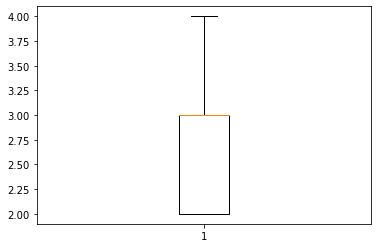

In [27]:
plt.boxplot(df_3["Quantity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x19215eeb160>,
 'caps': [<matplotlib.lines.Line2D at 0x19215eeb700>,
 'boxes': [<matplotlib.lines.Line2D at 0x19215ed9e50>],
 'medians': [<matplotlib.lines.Line2D at 0x19215eebca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19215eebf70>],
 'means': []}

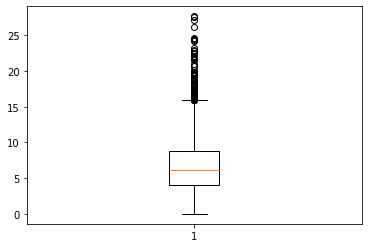

In [28]:
plt.boxplot(df_3["Shipping Cost"])

In [29]:
df_3["Shipping Cost"].quantile([0.1,0.25,0.5,0.75,1.0])

0.10     2.800
0.25     4.075
0.50     6.078
0.75     8.800
1.00    27.650
Name: Shipping Cost, dtype: float64

In [30]:
df_4=df_3[(df_3["Shipping Cost"] >=2.70) & (df_3["Shipping Cost"] <=7.23675)]

In [31]:
df_4.shape

(1455, 24)

{'whiskers': [<matplotlib.lines.Line2D at 0x19215f3a0a0>,
 'caps': [<matplotlib.lines.Line2D at 0x19215f3a640>,
 'boxes': [<matplotlib.lines.Line2D at 0x19215f2ed60>],
 'medians': [<matplotlib.lines.Line2D at 0x19215f3abe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19215f3aeb0>],
 'means': []}

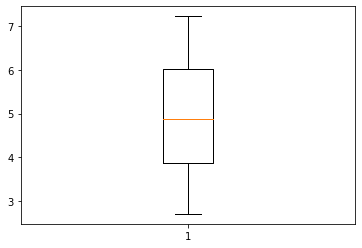

In [32]:
plt.boxplot(df_4["Shipping Cost"])

In [33]:
df_4.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
26583,10778,ES-2014-5617990,2014-09-11,2014-09-12,First Class,LW-16825,Laurel Workman,Corporate,Schiltigheim,Alsace,...,OFF-SU-10003160,Office Supplies,Supplies,"Acme Ruler, High Speed",33.420,2,0.0,1.320,7.230,High
26586,21231,IN-2012-45951,2012-11-02,2012-11-06,Standard Class,JG-15115,Jack Garza,Consumer,Bhopal,Madhya Pradesh,...,OFF-EN-10000315,Office Supplies,Envelopes,"Jiffy Business Envelopes, Security-Tint",47.880,3,0.0,9.090,7.230,High
26587,23945,IN-2012-40547,2012-11-29,2012-11-30,First Class,GT-14710,Greg Tran,Consumer,Adelaide,South Australia,...,OFF-BI-10004685,Office Supplies,Binders,"Acco Binder, Economy",40.905,3,0.1,9.495,7.230,High
26610,469,MX-2013-160115,2013-10-11,2013-10-18,Standard Class,TM-21490,Tony Molinari,Consumer,Ilopango,San Salvador,...,OFF-AR-10003989,Office Supplies,Art,"Sanford Pencil Sharpener, Fluorescent",51.660,3,0.0,22.680,7.224,Low
26611,1927,MX-2014-167724,2014-09-22,2014-09-24,First Class,CG-12520,Claire Gute,Consumer,Guantánamo,Guantánamo,...,OFF-PA-10001385,Office Supplies,Paper,"Xerox Memo Slips, 8.5 x 11",35.340,3,0.0,9.180,7.220,High


1. boxplot => to identify outlier
2. outlier => simple and effective IQR technique

# Missing value imputations

In [34]:
df_4.isnull().sum()

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
City                 0
State                0
Country              0
Postal Code       1195
Market               0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
Order Priority       0
dtype: int64

In [35]:
df_4.drop(["Postal Code"],axis=1,inplace=True)

C:\Users\Lalith Eswar\AppData\Local\Temp\ipykernel_30128\3596599742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4.drop(["Postal Code"],axis=1,inplace=True)


In [36]:
df_4.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [37]:
import numpy as np

In [38]:
df4_num=df_4.select_dtypes(include=[np.number])

In [39]:
df4_cat=df_4.select_dtypes(include=["object"])

In [40]:
df4_num.columns

Index(['Row ID', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [41]:
df4_cat.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')

# encoding, scaling

In [42]:
df4_num.drop(['Row ID'],axis=1,inplace=True)

In [43]:
from sklearn import preprocessing

In [44]:
le=preprocessing.LabelEncoder()

In [45]:
mm_scaler = preprocessing.MinMaxScaler()

In [46]:
df4_cat_e =df4_cat.apply(le.fit_transform)

In [47]:
df4_num.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [48]:
df4_num_mm =mm_scaler.fit_transform(df4_num)

In [49]:
df4_num_mm_sc=pd.DataFrame(df4_num_mm)

In [50]:
df4_num_mm_sc.head()

,0,1,2,3,4
0,0.135270,0.0,0.0,0.036214,1.000000
1,0.335270,0.5,0.0,0.249383,1.000000
2,0.238797,0.5,0.2,0.260494,1.000000
3,0.387552,0.5,0.0,0.622222,0.998675
4,0.161826,0.5,0.0,0.251852,0.997792


In [51]:
df4_cat_e.head()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
26583,553,0,489,372,1,648,15,29,4,3,1057,1,12,57,0
26586,651,3,377,280,0,101,221,36,0,4,445,1,5,471,0
26587,647,0,326,261,0,3,345,4,0,9,392,1,3,19,0
26610,1089,3,763,622,0,320,324,27,5,3,224,1,2,642,1
26611,1183,0,140,134,0,288,143,21,5,2,800,1,9,806,0


In [52]:
d1=df4_cat_e.reset_index()

In [53]:
d1.head()

,index,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,26583,553,0,489,372,1,648,15,29,4,3,1057,1,12,57,0
1,26586,651,3,377,280,0,101,221,36,0,4,445,1,5,471,0
2,26587,647,0,326,261,0,3,345,4,0,9,392,1,3,19,0
3,26610,1089,3,763,622,0,320,324,27,5,3,224,1,2,642,1
4,26611,1183,0,140,134,0,288,143,21,5,2,800,1,9,806,0


In [54]:
d1.drop(["index"],axis=1,inplace=True)

In [55]:
df_final=pd.concat([df4_num_mm_sc,d1],axis=1)

In [56]:
df_final.rename(columns={0:"Sales",1:"Quantity",2:"Discount",3:"Profit",4:"Shipping Cost"},inplace=True)

In [57]:
df_final.head()

,Sales,Quantity,Discount,Profit,Shipping Cost,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,0.135270,0.0,0.0,0.036214,1.000000,553,0,489,372,1,648,15,29,4,3,1057,1,12,57,0
1,0.335270,0.5,0.0,0.249383,1.000000,651,3,377,280,0,101,221,36,0,4,445,1,5,471,0
2,0.238797,0.5,0.2,0.260494,1.000000,647,0,326,261,0,3,345,4,0,9,392,1,3,19,0
3,0.387552,0.5,0.0,0.622222,0.998675,1089,3,763,622,0,320,324,27,5,3,224,1,2,642,1
4,0.161826,0.5,0.0,0.251852,0.997792,1183,0,140,134,0,288,143,21,5,2,800,1,9,806,0


In [58]:
df_final.isnull().sum()

Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Order Priority    0
dtype: int64

In [59]:
df_final["Order Priority"].unique()

array([0, 1])

In [60]:
X=df_final.drop(["Order Priority"],axis=1)
Y=df_final["Order Priority"]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify = Y)

# modeling

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr = LogisticRegression()

In [66]:
dtr=DecisionTreeClassifier(criterion="gini")

In [67]:
rf=RandomForestClassifier(n_estimators=100,random_state=50)

In [68]:
lrm_model = lr.fit(X_train,y_train)

C:\Users\Lalith Eswar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
dtm_model =dtr.fit(X_train,y_train)

In [70]:
rfm_model = rf.fit(X_train,y_train)

In [71]:
lr.score(X_train,y_train)

0.8428290766208252

In [72]:
dtr.score(X_train,y_train)

1.0

In [73]:
rf.score(X_train,y_train)

1.0

In [74]:
from sklearn.svm import SVC

In [75]:
svm = SVC(kernel= 'linear', random_state=1, C=0.1) #kernel 'linear','rbf'

In [76]:
#svm_model = svm.fit(X,Y)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn_model = KNeighborsClassifier(n_neighbors=4)

In [79]:
knn_m=knn_model.fit(X_train,y_train)

In [80]:
knn_model.score(X_train,y_train)

0.869351669941061

In [81]:
y_pre=knn_model.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_test, y_pre)

array([[369,   6],
       [ 62,   0]], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score  

In [99]:
from sklearn.metrics import f1_score  

In [100]:
f1_score(y_test, y_pre) 

0.0

In [85]:
accuracy_score(y_test, y_pre)  

0.8443935926773455

In [93]:
pd.DataFrame({"res":y_pre}).describe()

,res
count,437.000000
mean,0.013730
std,0.116501
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [97]:
pd.Series(y_pre)

0      0
1      0
2      0
3      0
4      0
      ..
432    0
433    0
434    0
435    0
436    0
Length: 437, dtype: int32

In [98]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, pd.Series(y_pre))

0.0

In [87]:
recall_score(y_test, y_pre)

0.0